In [61]:
import matplotlib 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm,ticker
from matplotlib import rc
%matplotlib inline
rc('text', usetex=True)
font = {'weight' : 'bold','size'   : 22}
matplotlib.rc('font', **font)
#############################################
#############################################
import os, sys
from copy import deepcopy as dcopy
import numpy as np
import healpy as hp
sys.path.insert(1, '/media/BINGODATA1/ComponentSeparation/amarins_cs/CHISEL/scripts')
import Extension4BINGO as cs
sys.path.insert(1, '/media/BINGODATA1/ComponentSeparation/beam_analyzes/scripts'   )
import handling_data          as hdata
import auxiliary_functions    as auxf

"sky_960mhz1260mhz_nch30_mk_fullsky_nonoise_nobeam.fits"


output_info = {'field':'FG', 
               "psm_models": ["s1","d1","a1","f1","c1"],
               "frequency":{"min":980,"max":1260,'nbands':30},
               "coverage":'full',
               'beam': {'model':None, 'fwhm':10}, 
               'stokes':"I",
               "freq_unit":"MHz", "stokes_unit":"mk", "fwhm_unit":"arcmin",
               'NSIDE':512,
               "realization":0,
               "output_dir":'/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/FG512',
               "clear_output_dir":False,
               "include_rps": True,
               "pathrps": "/media/BINGODATA1/ComponentSeparation/Foregrounds_Lucas/output/",
               "filename_rps":"point_sources_cube_FG_512.fits"}


In [62]:
pathdir_fg = '/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/FG512'
print(os.listdir(pathdir_fg))
pathdir_ps = "/media/BINGODATA1/ComponentSeparation/Foregrounds_Lucas/output/"
print(os.listdir(pathdir_ps))

['FG_Q_512_980mhz1260mhz_30bins_full_L0.fits', 'FG_U_512_980mhz1260mhz_30bins_full_L0.fits', 'FG_I_512_980mhz1260mhz_30bins_full_nonfrps_L0.fits', 'FG_I_512_980mhz1260mhz_30bins_full_L0.fits']
['point_sources_cube_FG256_fast_nch37_1050_1420.fits', 'foreground_cube_FG256_ska_nch70_350_1050.fits', 'synch_cube_FG_256.fits', 'synch_cube_FG_512.fits', 'cmb_cube_FG_512.fits', 'point_sources_cube_FG_512.fits', 'foreground_cube_FG_512.fits', 'point_sources_cube_FG256_ska_nch70_350_1050.fits', 'foreground_cube_FG_256.fits', 'point_sources_cube_FG_256.fits', 'cmb_cube_FG_256.fits', 'foreground_cube_FG256_fast_nch37_1050_1420.fits']


In [63]:
filename_fg = 'FG_I_512_980mhz1260mhz_30bins_full_nonfrps_L0.fits'
filename_ps = 'point_sources_cube_FG_512.fits'

In [64]:
map_fg = hdata.getmap(dirpath_ = pathdir_fg, filename_= filename_fg, 
                      healpix_readingformat=False, hdu=1)
map_ps = hdata.getmap(dirpath_ = pathdir_ps, filename_= filename_ps, 
                    healpix_readingformat=False, hdu=0)
#map_ps = hp.Rotator(coord=['G','C']).rotate_map_pixel(map_ps)

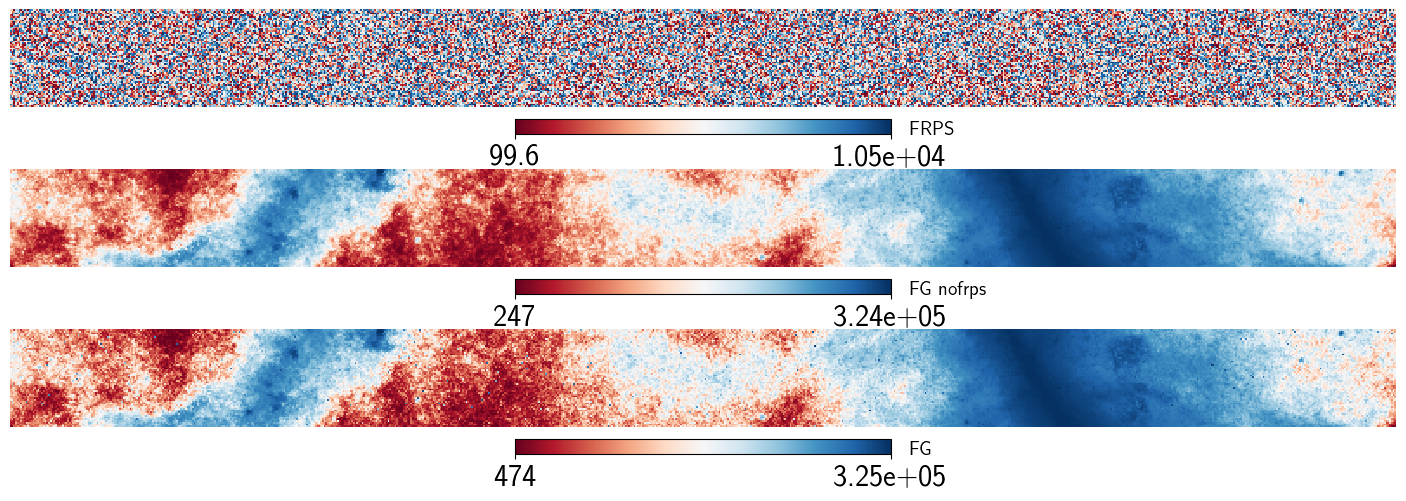

In [65]:
dec_min = -25.282 #from hitmap
dec_max =  -9.897
Dec_min = dec_min - 5
Dec_max = dec_max + 5
CMAP    = "RdBu"
#############################################################################
ich = 0
MAP1 = dcopy(map_ps[ich])
MAP2 = dcopy(map_fg[ich])
MAP3 = dcopy(map_fg[ich]+map_ps[ich])

ini = 0
end = 2
plt.figure(figsize=(14,(end-ini)*2.4))
_names_ = ['FRPS', 'FG nofrps', 'FG']
_maps_  = [MAP1, MAP2, MAP3]

_names_ = _names_[ini:end+1]
_maps_  = _maps_[ ini:end+1]
size    = len(_maps_)
_pos_   = ["{}1{}".format(size,i+1) for i in range(size)]
for i in range(size):
    hp.cartview( _maps_[i],  norm="hist", unit=_names_[i],  latra=[Dec_min,Dec_max], cmap=CMAP, title=None,sub=int(_pos_[i]))#, min=-100, max=100)

In [66]:
map_fg_sky = dcopy(map_fg+map_ps)
map_fg_sky = hp.ud_grade(map_fg_sky, 256)

In [67]:
pathdir_sky  = '/media/BINGODATA1/ComponentSeparation/MAPS/HS'
filename_sky = 'sky_960mhz1260mhz_nch30_mk_fullsky_nonoise_nobeam.fits'

map_sky = hdata.getmap(dirpath_ = pathdir_sky, filename_= filename_sky, 
                       healpix_readingformat=False, hdu=0)

In [68]:
import astropy.io.fits as fits
with fits.open(os.path.join(pathdir_sky, filename_sky)) as h:
    hdul = dcopy(h)
print('HEADER:\n')
print(repr(hdul[0].header))

HEADER:

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =               786432                                                  
NAXIS2  =                   30                                                  


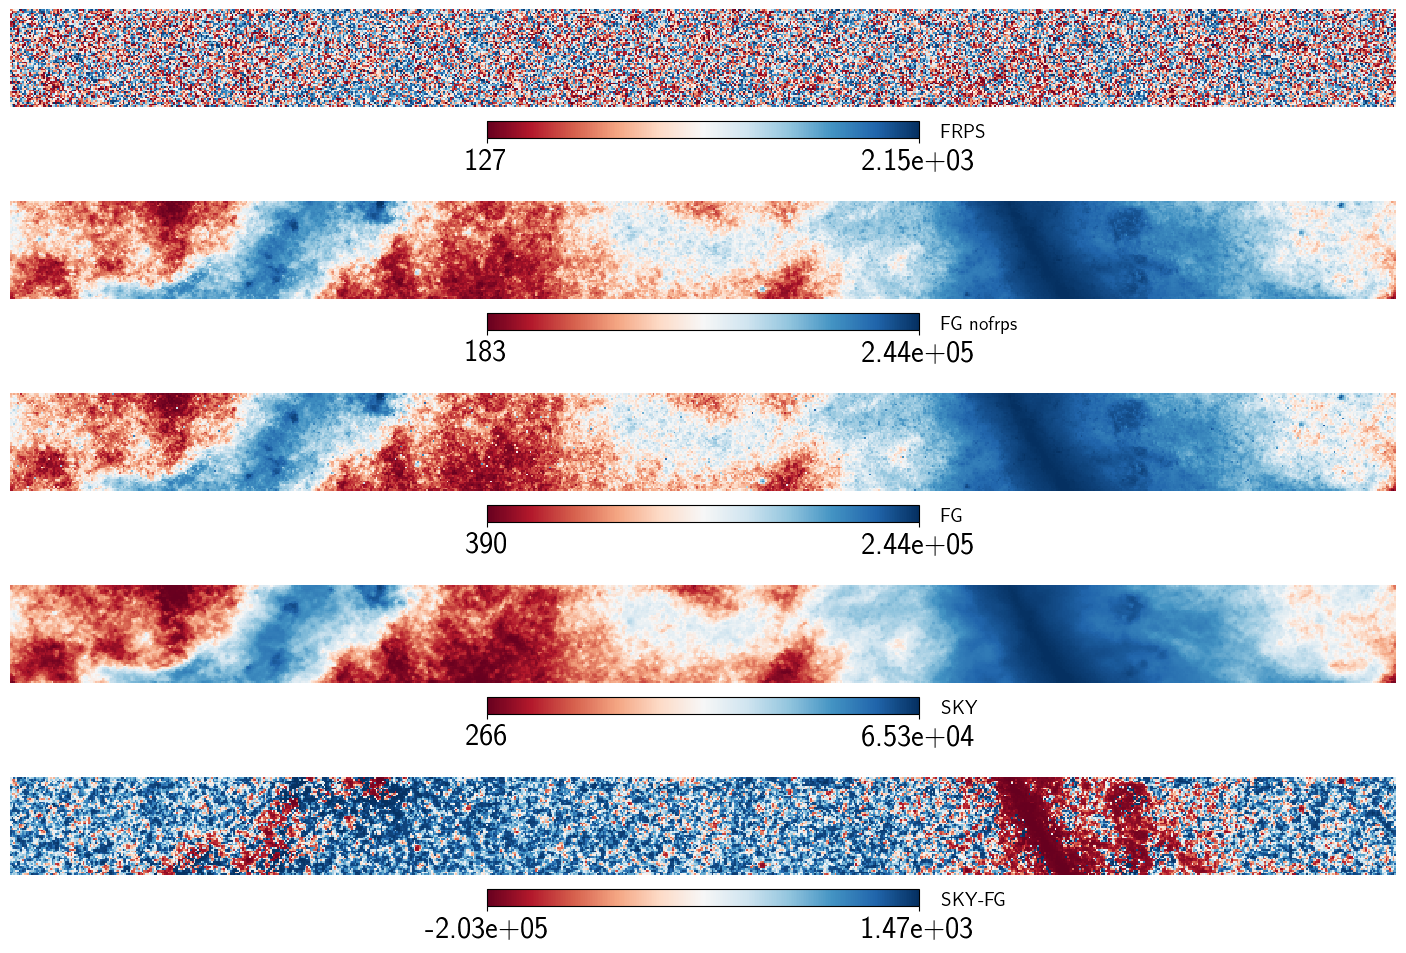

In [69]:
dec_min = -25.282 #from hitmap
dec_max =  -9.897
Dec_min = dec_min - 5
Dec_max = dec_max + 5
CMAP    = "RdBu"
#############################################################################
ich = 14
MAP1 = dcopy(hp.ud_grade(map_ps[ich], 256))
MAP2 = dcopy(hp.ud_grade(map_fg[ich], 256))
MAP3 = dcopy(map_fg_sky[ich])
MAP4 = dcopy(map_sky[ich])
MAP5 = dcopy(map_sky[ich]-MAP2)

ini = 0
end = 4
plt.figure(figsize=(14,(end-ini)*2.4))
_names_ = ['FRPS', 'FG nofrps', 'FG', 'SKY', 'SKY-FG']
_maps_  = [MAP1, MAP2, MAP3, MAP4, MAP5]

_names_ = _names_[ini:end+1]
_maps_  = _maps_[ ini:end+1]
size    = len(_maps_)
_pos_   = ["{}1{}".format(size,i+1) for i in range(size)]
for i in range(size):
    hp.cartview( _maps_[i],  norm="hist", unit=_names_[i],  latra=[Dec_min,Dec_max], cmap=CMAP, title=None,sub=int(_pos_[i]))#, min=-100, max=100)

In [70]:
ich = 29

pathdir_lucas =  "/media/BINGODATA1/ComponentSeparation/Foregrounds_Lucas/output/"
filename_lucas = 'foreground_cube_FG_256.fits'
map_lucas = hdata.getmap(dirpath_ = pathdir_lucas, filename_= filename_lucas, 
                       healpix_readingformat=False, hdu=0)
map_lucas= hp.Rotator(coord=['G','C']).rotate_map_pixel(map_lucas[-ich])

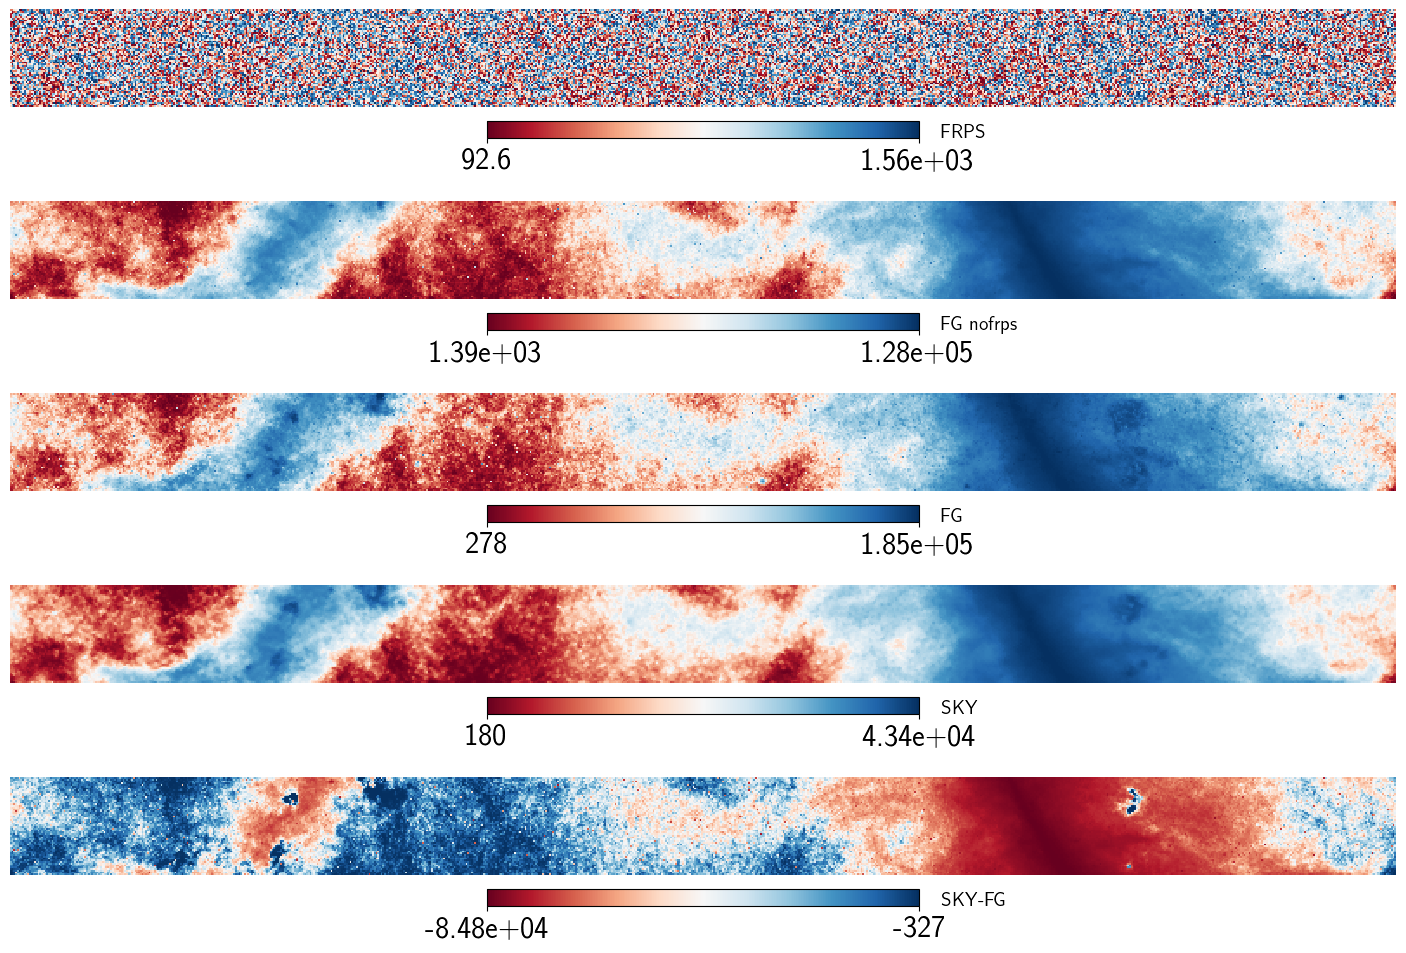

In [71]:
dec_min = -25.282 #from hitmap
dec_max =  -9.897
Dec_min = dec_min - 5
Dec_max = dec_max + 5
CMAP    = "RdBu"
#############################################################################
MAP1 = dcopy(hp.ud_grade(map_ps[ich], 256))
MAP2 = dcopy(map_lucas)
MAP3 = dcopy(map_fg_sky[ich])
MAP4 = dcopy(map_sky[ich])
MAP5 = dcopy(map_sky[ich]-MAP2)

ini = 0
end = 4
plt.figure(figsize=(14,(end-ini)*2.4))
_names_ = ['FRPS', 'FG nofrps', 'FG', 'SKY', 'SKY-FG']
_maps_  = [MAP1, MAP2, MAP3, MAP4, MAP5]

_names_ = _names_[ini:end+1]
_maps_  = _maps_[ ini:end+1]
size    = len(_maps_)
_pos_   = ["{}1{}".format(size,i+1) for i in range(size)]
for i in range(size):
    hp.cartview( _maps_[i],  norm="hist", unit=_names_[i],  latra=[Dec_min,Dec_max], cmap=CMAP, title=None,sub=int(_pos_[i]))#, min=-100, max=100)

In [72]:
path_fg   = '/media/BINGODATA1/ComponentSeparation/MAPS/PAPER/PSM_Components'
fg = hdata.getforegrounds(path_fg)['total']
####
###
#Nao sera exato, pois eu nao fixei o seed quando gerei a o processo de deconvolucao.
#
path_pure = '/media/BINGODATA1/ComponentSeparation/MAPS/PAPER/'
file_pure = 'Cube_21_L0_Smooth.fits'
pure      = hdata.getmap(dirpath_ =path_pure, 
                         filename_=file_pure, 
                         healpix_readingformat=False, hdu=0)
map_hi_decov = np.ones_like(pure)
for i in range(pure.shape[0]): 
    pure_i = dcopy(pure[i])
    nside  = hp.get_nside(pure_i)
    lmax   = 3*nside
    blg_hp = hp.gauss_beam(fwhm=np.radians(40/60),lmax=lmax, pol=False)
    cl_pure       = hp.anafast(pure_i, lmax = lmax, pol=False)
    cl_pure_decov = cl_pure/(blg_hp**2)
    pure_i_decov  = hp.synfast(cl_pure_decov, nside, lmax=lmax, pol=False)
    map_hi_decov[i] = dcopy(pure_i_decov)

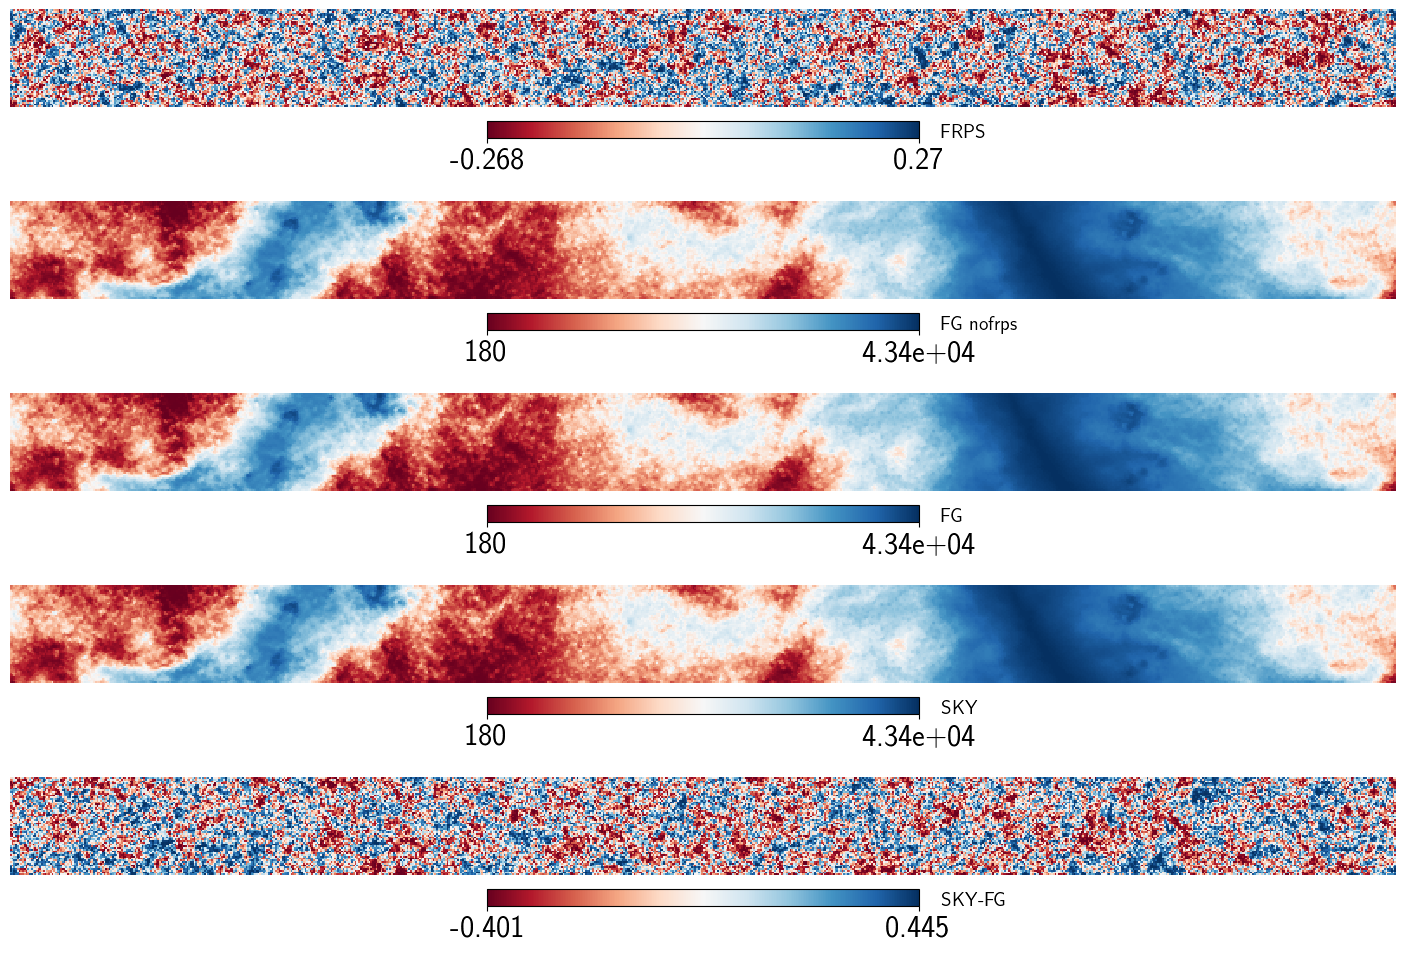

In [73]:
dec_min = -25.282 #from hitmap
dec_max =  -9.897
Dec_min = dec_min - 5
Dec_max = dec_max + 5
CMAP    = "RdBu"
#############################################################################
MAP1 = dcopy(map_hi_decov[ich])#hp.ud_grade(map_ps[ich], 256))
MAP2 = dcopy(fg[ich])
MAP3 = dcopy(MAP1 + MAP2)
MAP4 = dcopy(map_sky[ich])
MAP5 = dcopy(map_sky[ich]-MAP3)

ini = 0
end = 4
plt.figure(figsize=(14,(end-ini)*2.4))
_names_ = ['FRPS', 'FG nofrps', 'FG', 'SKY', 'SKY-FG']
_maps_  = [MAP1, MAP2, MAP3, MAP4, MAP5]

_names_ = _names_[ini:end+1]
_maps_  = _maps_[ ini:end+1]
size    = len(_maps_)
_pos_   = ["{}1{}".format(size,i+1) for i in range(size)]
for i in range(size):
    hp.cartview( _maps_[i],  norm="hist", unit=_names_[i],  latra=[Dec_min,Dec_max], cmap=CMAP, title=None,sub=int(_pos_[i]))#, min=-100, max=100)

In [74]:
fg = hdata.getforegrounds(path_fg)['total']
observed = fg#+ pure_decov
vec_hdu0  = observed
hdu0 = fits.PrimaryHDU(data=vec_hdu0)
hdul = fits.HDUList([hdu0])  
pathout = '/media/BINGODATA1/ComponentSeparation/MAPS/HS'
filename = 'fg_960mhz1260mhz_nch30_mk_fullsky_nonoise_nobeam.fits'
pathout = os.path.join(pathout,filename)
hdul.writeto(pathout,overwrite=True)

In [75]:
pathout

'/media/BINGODATA1/ComponentSeparation/MAPS/HS/fg_960mhz1260mhz_nch30_mk_fullsky_nonoise_nobeam.fits'

In [76]:
70/np.sqrt(365)

3.6639674581314963

#### FG MAPS PROCESSED BY HIDE

In [77]:
dirM   = '/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/M256'
pathM  = 'mask_256_apodcutless.fits'
M      = hdata.getmap(dirpath_ = dirM,filename_= pathM, 
                      healpix_readingformat=False, hdu=1)

In [78]:
###############################
### EXTRACTING MAPS TO BE SAVED
nch           = 30
mapname       = 'naivemap'
first_channel = 0 
hdu_map       = 0  #which HDU (for fits format) is storage the map
add_name      = None#'noiseless' #to be included after the mapname in the final map
stack_channel_sorting = True #otherwise, inverse like redshift
###############################################################
#NOISELESS FGHS MAPS
dirpath    = '/media/BINGODATA1/ComponentSeparation/HS/data/fits_240504_fg/1d_noiseless/maps/'
dict_fghs  = {'mapname':mapname, 'dirpath':dirpath,  'first_channel':first_channel, 'nch':nch,
              'hdu_map':hdu_map, 'add_name':add_name,'stack_channel_sorting':stack_channel_sorting}
naive_fghs = dcopy(auxf.HIDEmaps2multichannel(dict_fghs))
#################################################################
#
dirpath  = '/media/BINGODATA1/ComponentSeparation/MAPS/PAPER_HS/HS'
filename = 'HS_I_256_960mhz1260mhz_30bins_partial_40arcmin_gaussianbeam_1d_Tsys70K_L0001.fits'
HS       = hdata.getmap(dirpath_ = dirpath, filename_= filename, 
                        healpix_readingformat=False, hdu=1)

#################################################################
#
omap = hdata.getmap(dirpath_ = '/media/BINGODATA1/ComponentSeparation',
                    filename_= 'sky_960mhz1260mhz_nch30_mk_fullsky_nonoise_nobeam.fits', 
                    healpix_readingformat=False, hdu=0)
HS_input = dcopy(omap)

path_fg   = '/media/BINGODATA1/ComponentSeparation/MAPS/PAPER/PSM_Components'
fg        = hdata.getforegrounds(path_fg)['total']
#fg        = np.flip(fg,axis=0)

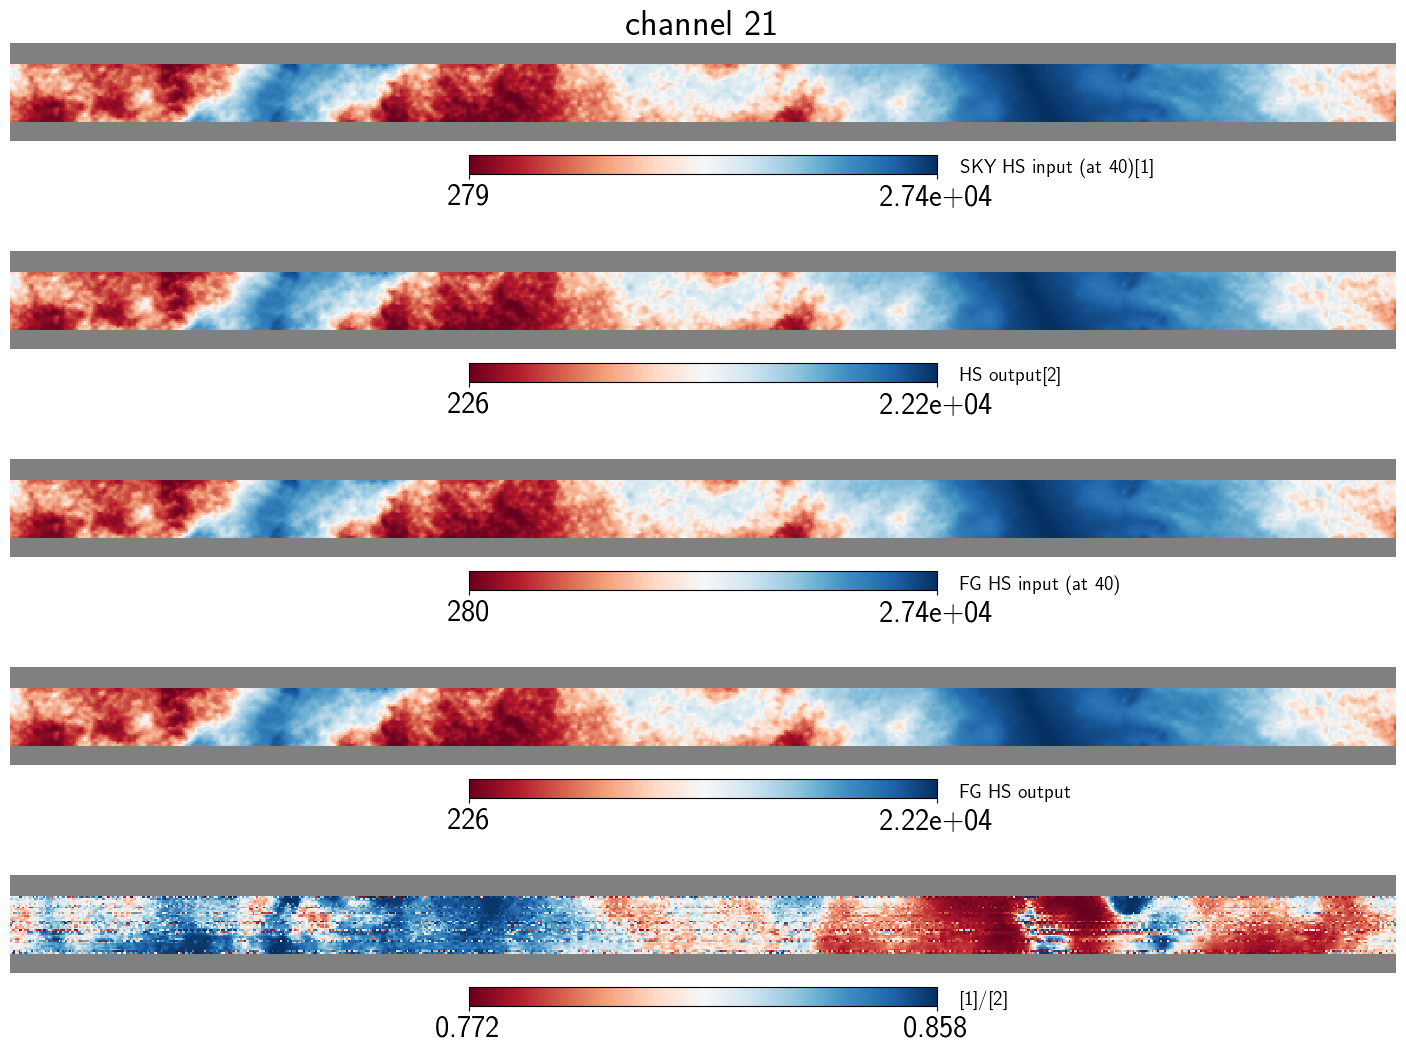

In [79]:
ich=20

dec_min = -25.282 #from hitmap
dec_max =  -9.897
Dec_min = dec_min - 5
Dec_max = dec_max + 5
CMAP    = "RdBu"
ind  = np.where(M<=0)[0]
#############################################################################
MAP1 = dcopy(HS_input[ich])
MAP1 = hp.smoothing(map_in=MAP1, fwhm=0.011, pol=False)
MAP2 = dcopy(HS[ich])
MAP3 = dcopy(fg[ich])
MAP3 = hp.smoothing(map_in=MAP3, fwhm=0.011, pol=False)
MAP4 = dcopy(naive_fghs[ich])
MAP5 = dcopy(MAP2/MAP1)

######################
MAP1[ind]=hp.UNSEEN
MAP2[ind]=hp.UNSEEN
MAP3[ind]=hp.UNSEEN
MAP4[ind]=hp.UNSEEN
MAP5[ind]=hp.UNSEEN
######################
ini = 0
end = 4
plt.figure(figsize=(14,(end-ini)*2.6))
_names_ = ['SKY HS input (at 40)[1]', 'HS output[2]', 'FG HS input (at 40)', 'FG HS output', '[1]/[2]']
_maps_  = [ MAP1, MAP2, MAP3, MAP4, MAP5]

_names_ = _names_[ini:end+1]
_maps_  = _maps_[ ini:end+1]
size    = len(_maps_)
_pos_   = ["{}1{}".format(size,i+1) for i in range(size)]
for i in range(size):
    if not i: title_name = 'channel {}'.format(ich+1)
    else:     title_name = None
    hp.cartview( _maps_[i],  norm="hist", unit=_names_[i],  
                latra=[Dec_min,Dec_max], cmap=CMAP, sub=int(_pos_[i]),
                title=title_name)#, min=-100, max=100)

In [80]:
dirM   = '/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/M256'
pathM  = 'mask_256_apodcutless.fits'
M      = hdata.getmap(dirpath_ = dirM,filename_= pathM, 
                      healpix_readingformat=False, hdu=1)


cl1 = hp.anafast(map1=MAP1, pol=False)
cl2 = hp.anafast(map1=MAP2, pol=False)
cl3 = hp.anafast(map1=MAP3, pol=False)
cl4 = hp.anafast(map1=MAP4, pol=False)
cl5 = hp.anafast(map1=MAP5, pol=False)

Text(0.5, 1.0, 'channel 21')

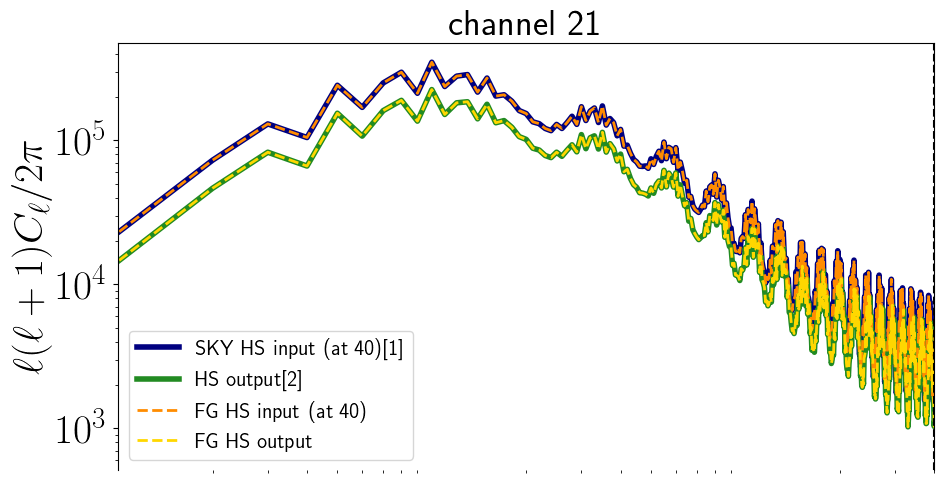

In [81]:
fig       = plt.figure()
grid      = plt.GridSpec(1,1,top=1.,right=1.4, hspace=0.0, wspace=0)
l         = np.arange(cl1.size)
fact      = l*(l+1)/(2*np.pi)

##############################
_cl_    = [ cl1, cl2, cl3, cl4, cl5]
c1 = ['navy', 'forestgreen', 'darkorange', 'gold']
ini,end =0,3
##############################

ax = plt.subplot(grid[0,0])
for i,(ic,iname,iS,iw) in enumerate(zip(_cl_[ini:end+1],
                                        _names_[ini:end+1],
                                        ['solid','solid','dashed', 'dashed','solid'][ini:end+1], 
                                        [4,4,2,2,3][ini:end+1])):
    plt.plot(   l,fact*ic , color=c1[i], label=iname, linewidth =iw,  linestyle=iS)

plt.xscale("log"),plt.yscale("log")
ax.tick_params(axis='both', which='major', labelsize = 30)
plt.ylabel(r"$\ell(\ell+1)C_{\ell}/2\pi$", fontsize=30)
#plt.xlabel(r'$\ell$', fontsize=30)
plt.xticks([])
ax.spines['bottom'].set_visible(False)
#ax.xaxis.tick_top()
#plt.ylim(1e1, 1e6)
plt.xlim(1e0, 400)
plt.axvline(x=400, linestyle='dashed', color='black')
plt.legend(fontsize=15)
plt.title( 'channel {}'.format(ich+1) ) 

In [92]:
for i, ich in enumerate([0, 1, 10, 29]) :
    MAP1 = dcopy(HS_input[ich])
    MAP1 = hp.smoothing(map_in=MAP1, fwhm=0.011, pol=False)
    MAP2 = dcopy(HS[ich])
    MAP12 = dcopy(MAP1 - MAP2)
    #
    MAP3 = dcopy(fg[ich])
    MAP3 = hp.smoothing(map_in=MAP3, fwhm=0.011, pol=False)
    MAP4 = dcopy(naive_fghs[ich])
    MAP34 = dcopy(MAP3 - MAP4)
    
    ######################
    MAP12[ind]=hp.UNSEEN
    MAP34[ind]=hp.UNSEEN
    ####################
    cl12 = hp.anafast(map1=MAP12, pol=False)
    cl34 = hp.anafast(map1=MAP34, pol=False)
    if not i:
        CL12 = {str(ich): cl12} #SKY
        CL34 = {str(ich): cl34}
    else:
        CL12[str(ich)] = cl12 #FG
        CL34[str(ich)] = cl34
del MAP12, MAP34

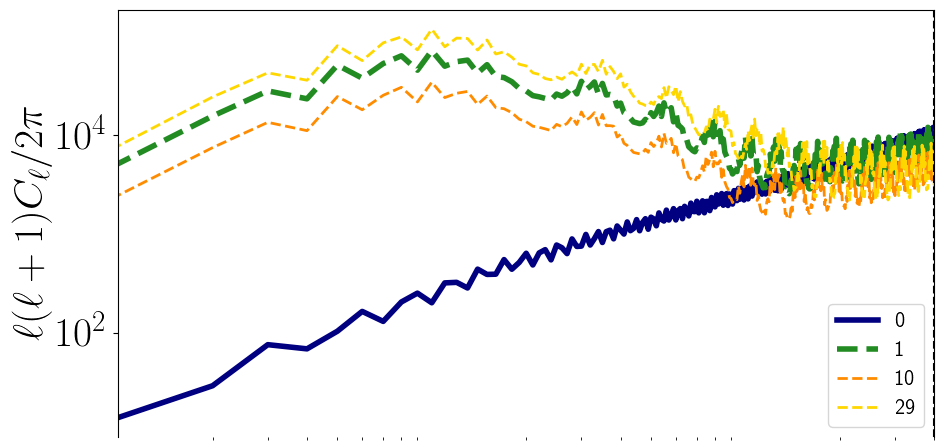

In [94]:
fig       = plt.figure()
grid      = plt.GridSpec(1,1,top=1.,right=1.4, hspace=0.0, wspace=0)
l         = np.arange(cl1.size)
fact      = l*(l+1)/(2*np.pi)

##############################
c1 = ['navy', 'forestgreen', 'darkorange', 'gold']
ini,end =0,3
CL = dcopy(CL34)
##############################
ax = plt.subplot(grid[0,0])
for i,(ikey,iS,iw) in enumerate(zip(list(CL.keys())[ini:end+1],
                                        ['solid','dashed','dashed', 'dashed','solid'][ini:end+1], 
                                        [4,4,2,2,3][ini:end+1])):
    plt.plot(   l,fact*CL[ikey], color=c1[i], label=ikey, linewidth =iw,  linestyle=iS)

plt.xscale("log"),plt.yscale("log")
ax.tick_params(axis='both', which='major', labelsize = 30)
plt.ylabel(r"$\ell(\ell+1)C_{\ell}/2\pi$", fontsize=30)
#plt.xlabel(r'$\ell$', fontsize=30)
plt.xticks([])
ax.spines['bottom'].set_visible(False)
#ax.xaxis.tick_top()
#plt.ylim(1e1, 1e6)
plt.xlim(1e0, 400)
plt.axvline(x=400, linestyle='dashed', color='black')
plt.legend(fontsize=15)
#plt.title( 'channel {}'.format(ich+1) ) 

In [102]:
for i, ich in enumerate([0, 1, 10, 29]) :
    MAP1 = hp.smoothing(map_in=dcopy(HS_input[ich]), fwhm=0.011, pol=False)
    MAP2 = dcopy(HS[ich])
    #
    MAP3 = hp.smoothing(map_in=dcopy(fg[ich]), fwhm=0.011, pol=False)
    MAP4 = dcopy(naive_fghs[ich])
    ####################
    cl12 = hp.anafast(map1=MAP1, pol=False)-hp.anafast(map1=MAP2, pol=False)
    cl34 = hp.anafast(map1=MAP3, pol=False)-hp.anafast(map1=MAP4, pol=False)
    if not i:
        CL12 = {str(ich): cl12} #SKY
        CL34 = {str(ich): cl34}
    else:
        CL12[str(ich)] = cl12 #FG
        CL34[str(ich)] = cl34

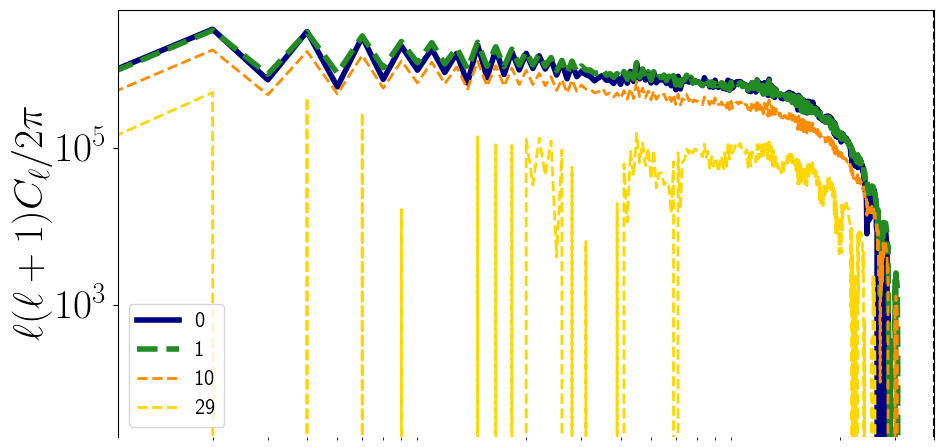

In [103]:
fig       = plt.figure()
grid      = plt.GridSpec(1,1,top=1.,right=1.4, hspace=0.0, wspace=0)
l         = np.arange(cl1.size)
fact      = l*(l+1)/(2*np.pi)

##############################
c1 = ['navy', 'forestgreen', 'darkorange', 'gold']
ini,end =0,3
CL = dcopy(CL12)
##############################
ax = plt.subplot(grid[0,0])
for i,(ikey,iS,iw) in enumerate(zip(list(CL.keys())[ini:end+1],
                                        ['solid','dashed','dashed', 'dashed','solid'][ini:end+1], 
                                        [4,4,2,2,3][ini:end+1])):
    plt.plot(   l,fact*CL[ikey], color=c1[i], label=ikey, linewidth =iw,  linestyle=iS)

plt.xscale("log"),plt.yscale("log")
ax.tick_params(axis='both', which='major', labelsize = 30)
plt.ylabel(r"$\ell(\ell+1)C_{\ell}/2\pi$", fontsize=30)
#plt.xlabel(r'$\ell$', fontsize=30)
plt.xticks([])
ax.spines['bottom'].set_visible(False)
#ax.xaxis.tick_top()
#plt.ylim(1e1, 1e6)
plt.xlim(1e0, 400)
plt.axvline(x=400, linestyle='dashed', color='black')
plt.legend(fontsize=15)
#plt.title( 'channel {}'.format(ich+1) ) 

###############################
### EXTRACTING MAPS TO BE SAVED -- FG`m

In [85]:
output_info = {'field'      :'FGHS', 
               "frequency"  :{"min":960,"max":1260,'nbands':30},
               "coverage"   :'partial',
               "apply_beam" : False,                
               'beam'       : {'model':'gaussian', 'fwhm':0.6667}, 
               'stokes'     :'I',
               "freq_unit"  :"MHz", "stokes_unit":"mk", "fwhm_unit":"arcmin",
               "type_beam"  :'gaussian',
               "type_fwhm"  :'constante',
               "main_dish_diameter": 40,               
               'nside':256,
               "realization": '0001',
               "output_dir" : '/media/BINGODATA1/ComponentSeparation/MAPS/PAPER_HS/FGHS',
               "clear_output_dir":True,
               'add_name'   : '1d_addbackground'}

sigma_info = {'nside' :output_info['nside'],
              'nu_min':output_info['frequency']['min'],
              'nu_max':output_info['frequency']['max'],
              'nch'   :output_info['frequency']['nbands'],
              'nbeams':28,
              'Tsys'  :70,
              'Osur'  :5324,
              'Obeam' :0.35,
              'tsur'  :1,
              'K'     :2**(1/2),
              'fsky'  :0.13,
              'dcycle':1}#0.9}

ginfo = {'NSIDE'    :output_info['nside'],
         'frequency':{'min':   output_info['frequency']['min'],
                      'max':   output_info['frequency']['max'],
                      'nbands':output_info['frequency']['nbands']},
        'realization':output_info['realization']}

In [86]:
###############################
### EXTRACTING MAPS TO BE SAVED
nch           = 30
mapname       = 'naivemap'
first_channel = 0 
hdu_map       = 0  #which HDU (for fits format) is storage the map
add_name      = None#'noiseless' #to be included after the mapname in the final map
stack_channel_sorting = True #otherwise, inverse like redshift
###############################################################
#NOISELESS FGHS MAPS
# these maps have 'background' included
dirpath    = '/media/BINGODATA1/ComponentSeparation/HS/data/fits_240504_fg/1d_noiseless/maps/'
dict_fghs  = {'mapname':mapname, 'dirpath':dirpath,  'first_channel':first_channel, 'nch':nch,
              'hdu_map':hdu_map, 'add_name':add_name,'stack_channel_sorting':stack_channel_sorting}
naive_fghs = dcopy(auxf.HIDEmaps2multichannel(dict_fghs))
##########################################
##### SAVING
filename = hdata.return_new_FITSfilename(ginfo=ginfo, output_info=output_info  , add_info=output_info['add_name']  ) 
hdr_hdu0 = hdata.creating_primary_FITSheader(output_info)
hdr_hdu1 = hdata.creating_multimap_FITSheader(filename_   = filename, 
                                              freq_unit   = output_info['freq_unit'], 
                                              stokes_unit = output_info['stokes_unit'], 
                                              fwhm_unit   = output_info['fwhm_unit'])
vec_hdu0 = hdata.nu_bins_vector(numin_ =hdr_hdu0['FREQ_MIN'], 
                                numax_ =hdr_hdu0['FREQ_MAX'], 
                                nbands_=hdr_hdu0['NBANDS']   )['nu']
vec_hdu1 = dcopy(naive_fghs)    
hdu0     = fits.PrimaryHDU(header=hdr_hdu0, 
                             data=vec_hdu0)
hdu1     = fits.ImageHDU(  header=hdr_hdu1, 
                             data=vec_hdu1, 
                             name="MULTIMAPS")
hdul     = fits.HDUList([hdu0,hdu1])
                    
new_name = os.path.join(output_info['output_dir'], filename)
print("Saving at {}".format(new_name))
hdul.writeto(new_name,  overwrite=True)  

Saving at /media/BINGODATA1/ComponentSeparation/MAPS/PAPER_HS/FGHS/FGHS_I_256_960mhz1260mhz_30bins_partial_40arcmin_gaussianbeam_1d_addbackground_L0001.fits


In [87]:
os.listdir('/media/BINGODATA1/ComponentSeparation/MAPS/PAPER_HS/FGHS/')

['FGHS_I_256_960mhz1260mhz_30bins_partial_40arcmin_gaussianbeam_1d_addbackground_L0001.fits']

In [88]:
dirpath  = '/media/BINGODATA1/ComponentSeparation/MAPS/PAPER_HS/FGHS'
filename = 'FGHS_I_256_960mhz1260mhz_30bins_partial_40arcmin_gaussianbeam_1d_addbackground_L0001.fits'
FGHS     = hdata.getmap(dirpath_ = dirpath, filename_= filename, 
                        healpix_readingformat=False, hdu=1)

In [89]:
FGHS.shape

(30, 786432)